# single point data daily

In [1]:
'''
*Version: 2.0 Published: 2021/03/09* Source: [NASA POWER](https://power.larc.nasa.gov/)
POWER API Multi-Point Download
This is an overview of the process to request data from multiple data points from the POWER API.
'''

import os, sys, time, json, urllib3, requests, multiprocessing

urllib3.disable_warnings()

def download_function(collection):
    ''' '''

    request, filepath = collection
    response = requests.get(url=request, verify=False, timeout=30.00).json()

    with open(filepath, 'w') as file_object:
        json.dump(response, file_object)

class Process():

    def __init__(self):

        self.processes = 5 # Please do not go more than five concurrent requests.

        self.request_template = r"https://power.larc.nasa.gov/api/temporal/daily/point?parameters=ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_UV_INDEX,T2M,T2MDEW,TS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M,PS,WS50M&community=RE&longitude={longitude}&latitude={latitude}&start=19940101&end=20191230&format=JSON"
        self.filename_template = "download_data/single_point/daily/File_Lat_{latitude}_Lon_{longitude}.json"

        self.messages = []
        self.times = {}

    def execute(self):

        Start_Time = time.time()

        locations = [(22.67,92.11)]

        requests = []
        for latitude, longitude in locations:
            request = self.request_template.format(latitude=latitude, longitude=longitude)
            filename = self.filename_template.format(latitude=latitude, longitude=longitude)
            requests.append((request, filename))

        requests_total = len(requests)

        pool = multiprocessing.Pool(self.processes)
        x = pool.imap_unordered(download_function, requests)

        for i, df in enumerate(x, 1):
            sys.stderr.write('\rExporting {0:%}'.format(i/requests_total))

        self.times["Total Script"] = round((time.time() - Start_Time), 2)

        print ("\n")
        print ("Total Script Time:", self.times["Total Script"])

if __name__ == '__main__':
    Process().execute()




Total Script Time: 13.31


Exporting 100.000000%

In [ ]:
import json
file = open('download_data/single_point/daily/File_Lat_22.67_Lon_92.11.json')
daily = json.load(file)

print(list(daily.keys()))

len(list(daily['properties']['parameter']['ALLSKY_SFC_SW_DWN'].keys()))

# Region

In [5]:
'''
*Version: 1.0 Published: 2020/02/11* Source: [NASA POWER](https://power.larc.nasa.gov/)
POWER API Multipoint Download (CSV)
This is an overview of the process to request data from multiple data points from the POWER API.
'''

import os, sys, time, json, urllib3, requests, multiprocessing

urllib3.disable_warnings()

import numpy as np
import pandas as pd

def download_function(collection):
    ''' '''

    request, filepath = collection
    response = requests.get(url=request, verify=False, timeout=30.00).json()

    with open(filepath, 'w') as file_object:
        json.dump(response, file_object)
        
        
class Process():

    def __init__(self):

        self.processes = 5 # Please do not go more than five concurrent requests.

        self.request_template = r"https://power.larc.nasa.gov/api/temporal/daily/point?parameters=ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_UV_INDEX,T2M,T2MDEW,TS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M,PS,WS50M&community=RE&longitude={longitude}&latitude={latitude}&start=20040101&end=20191230&format=JSON"
        self.filename_template = "download_data/region/File_Lat_{latitude}_Lon_{longitude}.json"

        self.messages = []
        self.times = {}

    def execute(self):

        Start_Time = time.time()

        latitudes = np.arange(22.04, 23.14, 0.01) # Update your download extent.
        longitudes = np.arange(92.06, 92.95, 0.01) # Update your download extent.

        requests = []
        for longitude in longitudes:
            for latitude in latitudes:
                request = self.request_template.format(latitude=latitude, longitude=longitude)
                filename = self.filename_template.format(latitude=latitude, longitude=longitude)
                requests.append((request, filename))

        requests_total = len(requests)

        pool = multiprocessing.Pool(self.processes)
        x = pool.imap_unordered(download_function, requests)

        for i, df in enumerate(x, 1):
            sys.stderr.write('\rExporting {0:%}'.format(i/requests_total))

        self.times["Total Script"] = round((time.time() - Start_Time), 2)

        print ("\n")
        print ("Total Script Time:", self.times["Total Script"])
        
if __name__ == '__main__':
    Process().execute()

Exporting 99.989990%



Total Script Time: 20694.95


Exporting 100.000000%

In [6]:
file = 'download_data/region/File_Lat_22.060000000000002_Lon_92.06.json'

import json
file = open(file)
daily = json.load(file)

print(list(daily.keys()))

len(list(daily['properties']['parameter']['ALLSKY_SFC_SW_DWN'].keys()))

['type', 'geometry', 'properties', 'header', 'messages', 'parameters', 'times']


5843

# single point hourly

In [14]:
'''
*Version: 2.0 Published: 2021/03/09* Source: [NASA POWER](https://power.larc.nasa.gov/)
POWER API Multi-Point Download
This is an overview of the process to request data from multiple data points from the POWER API.
'''

import os, sys, time, json, urllib3, requests, multiprocessing

urllib3.disable_warnings()

def download_function(collection):
    ''' '''

    request, filepath = collection
    response = requests.get(url=request, verify=False, timeout=30.00).json()

    with open(filepath, 'w') as file_object:
        json.dump(response, file_object)

class Process():

    def __init__(self):

        self.processes = 5 # Please do not go more than five concurrent requests.

        self.request_template = r"https://power.larc.nasa.gov/api/temporal/hourly/point?parameters=ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_UV_INDEX,T2M,T2MDEW,TS,RH2M,PS,WS50M&community=RE&longitude={longitude}&latitude={latitude}&start=20100101&end=20111231&format=JSON"
        self.filename_template = "download_data/single_point/hourly/File_10-11_Lat_{latitude}_Lon_{longitude}.json"

        self.messages = []
        self.times = {}

    def execute(self):

        Start_Time = time.time()

        locations = [(22.67,92.11)]

        requests = []
        for latitude, longitude in locations:
            request = self.request_template.format(latitude=latitude, longitude=longitude)
            filename = self.filename_template.format(latitude=latitude, longitude=longitude)
            requests.append((request, filename))

        requests_total = len(requests)

        pool = multiprocessing.Pool(self.processes)
        x = pool.imap_unordered(download_function, requests)

        for i, df in enumerate(x, 1):
            sys.stderr.write('\rExporting {0:%}'.format(i/requests_total))

        self.times["Total Script"] = round((time.time() - Start_Time), 2)

        print ("\n")
        print ("Total Script Time:", self.times["Total Script"])


if __name__ == '__main__':
    Process().execute()




Total Script Time: 30.89


Exporting 100.000000%

In [16]:
import json
file_12_13 = open('download_data/single_point/hourly/File_12-13_Lat_22.67_Lon_92.11.json')
hourly = json.load(file)

hourly

print(list(hourly.keys()))

len(list(hourly['properties']['parameter']['ALLSKY_SFC_SW_DWN'].keys()))

['type', 'geometry', 'properties', 'header', 'messages', 'parameters', 'times']


17544

In [87]:
file_1 = open('download_data/single_point/hourly/File_10-11_Lat_22.67_Lon_92.11.json')
file_2 = open('download_data/single_point/hourly/File_12-13_Lat_22.67_Lon_92.11.json')
file_3 = open('download_data/single_point/hourly/File_14-15_Lat_22.67_Lon_92.11.json')
file_4 = open('download_data/single_point/hourly/File_16-17_Lat_22.67_Lon_92.11.json')
file_5 = open('download_data/single_point/hourly/File_18-19_Lat_22.67_Lon_92.11.json')



import pandas as pd
df_1 = pd.DataFrame()

file = json.load(file_1)
file = file['properties']['parameter']

column_name = list(file.keys())

time = list(file[column_name[0]].keys())

df_1['Time'] = time
for n in range(len(column_name)):
    df_1[column_name[n]] = list(file[column_name[n]].values())


,Time,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_UV_INDEX,T2M,T2MDEW,TS,RH2M,PS,WS50M
0,2018010106,7.66,7.35,0.27,362.70,0.00,17.30,16.89,16.99,97.31,100.88,2.28
1,2018010107,40.52,135.12,0.15,380.10,0.10,18.54,17.44,19.77,93.19,100.95,1.78
2,2018010108,109.26,333.17,0.20,383.38,0.73,20.03,17.51,22.29,85.44,101.02,1.17
3,2018010109,179.74,508.00,0.23,391.40,1.70,21.94,16.82,24.17,72.75,101.06,0.81
4,2018010110,294.63,632.88,0.33,396.35,3.45,22.70,16.69,24.60,68.75,101.02,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2020010101,0.00,0.00,-999.00,335.52,0.00,18.11,15.55,17.01,84.88,101.33,2.84
17516,2020010102,0.00,0.00,-999.00,336.88,0.00,17.85,15.60,16.90,86.50,101.30,3.01
17517,2020010103,0.00,0.00,-999.00,335.52,0.00,17.73,15.69,16.84,87.69,101.27,2.99
17518,2020010104,0.00,0.00,-999.00,334.70,0.00,17.63,15.68,16.54,88.25,101.28,2.77


In [88]:
df=pd.concat([df_1,df_2,df_3,df_4,df_5])

In [89]:
df=df.reset_index(drop=True)

In [90]:
df

,Time,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_UV_INDEX,T2M,T2MDEW,TS,RH2M,PS,WS50M
0,2010010106,10.45,8.15,0.36,308.02,0.00,12.01,12.41,12.46,100.00,101.04,4.05
1,2010010107,139.84,148.05,0.50,312.48,0.20,13.69,12.87,15.45,94.69,101.15,3.92
2,2010010108,334.69,359.02,0.62,328.77,1.20,15.49,13.36,18.74,87.00,101.23,3.58
3,2010010109,514.27,544.30,0.68,335.90,2.85,18.38,12.94,21.64,70.50,101.28,4.59
4,2010010110,685.15,679.58,0.76,313.05,4.73,20.09,13.10,23.79,64.00,101.25,4.70
...,...,...,...,...,...,...,...,...,...,...,...,...
87643,2020010101,0.00,0.00,-999.00,335.52,0.00,18.11,15.55,17.01,84.88,101.33,2.84
87644,2020010102,0.00,0.00,-999.00,336.88,0.00,17.85,15.60,16.90,86.50,101.30,3.01
87645,2020010103,0.00,0.00,-999.00,335.52,0.00,17.73,15.69,16.84,87.69,101.27,2.99
87646,2020010104,0.00,0.00,-999.00,334.70,0.00,17.63,15.68,16.54,88.25,101.28,2.77


In [91]:
df.to_parquet('solar_radiation_hourly_rangamati_10_years.parquet',index=False)

In [2]:
import pandas as pd
df = pd.read_parquet('solar_radiation_hourly_rangamati_10_years.parquet')

In [7]:
df

,Time,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_UV_INDEX,T2M,T2MDEW,TS,RH2M,PS,WS50M
0,2010010106,10.45,8.15,0.36,308.02,0.00,12.01,12.41,12.46,100.00,101.04,4.05
1,2010010107,139.84,148.05,0.50,312.48,0.20,13.69,12.87,15.45,94.69,101.15,3.92
2,2010010108,334.69,359.02,0.62,328.77,1.20,15.49,13.36,18.74,87.00,101.23,3.58
3,2010010109,514.27,544.30,0.68,335.90,2.85,18.38,12.94,21.64,70.50,101.28,4.59
4,2010010110,685.15,679.58,0.76,313.05,4.73,20.09,13.10,23.79,64.00,101.25,4.70
...,...,...,...,...,...,...,...,...,...,...,...,...
87643,2020010101,0.00,0.00,-999.00,335.52,0.00,18.11,15.55,17.01,84.88,101.33,2.84
87644,2020010102,0.00,0.00,-999.00,336.88,0.00,17.85,15.60,16.90,86.50,101.30,3.01
87645,2020010103,0.00,0.00,-999.00,335.52,0.00,17.73,15.69,16.84,87.69,101.27,2.99
87646,2020010104,0.00,0.00,-999.00,334.70,0.00,17.63,15.68,16.54,88.25,101.28,2.77


In [10]:
import json
file_10_14 = open('download_data/single_point/hourly/POWER_Point_Hourly_20100101_20141231_022d6700N_092d1100E_LST.json')
file_10_14 = json.load(file_10_14)
file_10_14

df_10_14 = pd.DataFrame()

file_10_14 = file_10_14['properties']['parameter']

column_name = list(file_10_14.keys())

time = list(file_10_14[column_name[0]].keys())

df_10_14['Time'] = time
for n in range(len(column_name)):
    df_10_14[column_name[n]] = list(file_10_14[column_name[n]].values())


In [11]:
df_10_14

,Time,SZA,PRECTOTCORR,WS10M,QV2M
0,2010010106,88.82,0.00,2.75,8.91
1,2010010107,78.62,0.00,3.04,9.16
2,2010010108,67.30,0.00,3.17,9.46
3,2010010109,57.47,0.00,4.01,9.22
4,2010010110,50.00,0.00,4.18,9.28
...,...,...,...,...,...
43819,2015010101,-999.00,0.00,1.41,11.05
43820,2015010102,-999.00,0.01,1.76,11.23
43821,2015010103,-999.00,0.06,1.97,11.29
43822,2015010104,-999.00,0.12,2.08,11.41


In [12]:
import json
file_15_19 = open('download_data/single_point/hourly/POWER_Point_Hourly_20150101_20191231_022d6700N_092d1100E_LST.json')
file_15_19 = json.load(file_15_19)
file_15_19

df_15_19 = pd.DataFrame()

file_15_19 = file_15_19['properties']['parameter']

column_name = list(file_15_19.keys())

time = list(file_15_19[column_name[0]].keys())

df_15_19['Time'] = time
for n in range(len(column_name)):
    df_15_19[column_name[n]] = list(file_15_19[column_name[n]].values())


In [14]:
df_temp = pd.concat([df_10_14,df_15_19])
df_temp = df_temp.reset_index(drop=True)
df_temp

,Time,SZA,PRECTOTCORR,WS10M,QV2M
0,2010010106,88.82,0.0,2.75,8.91
1,2010010107,78.62,0.0,3.04,9.16
2,2010010108,67.30,0.0,3.17,9.46
3,2010010109,57.47,0.0,4.01,9.22
4,2010010110,50.00,0.0,4.18,9.28
...,...,...,...,...,...
87643,2020010101,-999.00,0.0,2.04,10.93
87644,2020010102,-999.00,0.0,2.13,10.93
87645,2020010103,-999.00,0.0,2.12,10.99
87646,2020010104,-999.00,0.0,2.00,10.99


In [17]:
df = df.merge(df_temp,how='inner',on='Time')

In [18]:
df.to_parquet('solar_radiation_hourly_rangamati_10_years.parquet',index=False)

In [19]:
df.to_csv('solar_radiation_hourly_rangamati_10_years.csv',index=False)

# start editing from here after the first merge

In [127]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
df = pd.read_parquet('solar_radiation_hourly_rangamati_10_years.parquet')
df = df.dropna(how='any')
df.set_index('Time')
df.Time = df.Time.astype('int')
df

,Time,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_UV_INDEX,T2M,T2MDEW,TS,RH2M,PS,WS50M,SZA,PRECTOTCORR,WS10M,QV2M
0,2010010106,10.45,8.15,0.36,308.02,0.00,12.01,12.41,12.46,100.00,101.04,4.05,88.82,0.0,2.75,8.91
1,2010010107,139.84,148.05,0.50,312.48,0.20,13.69,12.87,15.45,94.69,101.15,3.92,78.62,0.0,3.04,9.16
2,2010010108,334.69,359.02,0.62,328.77,1.20,15.49,13.36,18.74,87.00,101.23,3.58,67.30,0.0,3.17,9.46
3,2010010109,514.27,544.30,0.68,335.90,2.85,18.38,12.94,21.64,70.50,101.28,4.59,57.47,0.0,4.01,9.22
4,2010010110,685.15,679.58,0.76,313.05,4.73,20.09,13.10,23.79,64.00,101.25,4.70,50.00,0.0,4.18,9.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,2020010101,0.00,0.00,-999.00,335.52,0.00,18.11,15.55,17.01,84.88,101.33,2.84,-999.00,0.0,2.04,10.93
87644,2020010102,0.00,0.00,-999.00,336.88,0.00,17.85,15.60,16.90,86.50,101.30,3.01,-999.00,0.0,2.13,10.93
87645,2020010103,0.00,0.00,-999.00,335.52,0.00,17.73,15.69,16.84,87.69,101.27,2.99,-999.00,0.0,2.12,10.99
87646,2020010104,0.00,0.00,-999.00,334.70,0.00,17.63,15.68,16.54,88.25,101.28,2.77,-999.00,0.0,2.00,10.99


In [129]:
df

,Time,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_UV_INDEX,T2M,T2MDEW,TS,RH2M,PS,WS50M,SZA,PRECTOTCORR,WS10M,QV2M
0,2010010106,10.45,8.15,0.36,308.02,0.00,12.01,12.41,12.46,100.00,101.04,4.05,88.82,0.0,2.75,8.91
1,2010010107,139.84,148.05,0.50,312.48,0.20,13.69,12.87,15.45,94.69,101.15,3.92,78.62,0.0,3.04,9.16
2,2010010108,334.69,359.02,0.62,328.77,1.20,15.49,13.36,18.74,87.00,101.23,3.58,67.30,0.0,3.17,9.46
3,2010010109,514.27,544.30,0.68,335.90,2.85,18.38,12.94,21.64,70.50,101.28,4.59,57.47,0.0,4.01,9.22
4,2010010110,685.15,679.58,0.76,313.05,4.73,20.09,13.10,23.79,64.00,101.25,4.70,50.00,0.0,4.18,9.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,2020010101,0.00,0.00,-999.00,335.52,0.00,18.11,15.55,17.01,84.88,101.33,2.84,-999.00,0.0,2.04,10.93
87644,2020010102,0.00,0.00,-999.00,336.88,0.00,17.85,15.60,16.90,86.50,101.30,3.01,-999.00,0.0,2.13,10.93
87645,2020010103,0.00,0.00,-999.00,335.52,0.00,17.73,15.69,16.84,87.69,101.27,2.99,-999.00,0.0,2.12,10.99
87646,2020010104,0.00,0.00,-999.00,334.70,0.00,17.63,15.68,16.54,88.25,101.28,2.77,-999.00,0.0,2.00,10.99


In [130]:
df[df.SZA != -999.0]

,Time,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_UV_INDEX,T2M,T2MDEW,TS,RH2M,PS,WS50M,SZA,PRECTOTCORR,WS10M,QV2M
0,2010010106,10.45,8.15,0.36,308.02,0.00,12.01,12.41,12.46,100.00,101.04,4.05,88.82,0.0,2.75,8.91
1,2010010107,139.84,148.05,0.50,312.48,0.20,13.69,12.87,15.45,94.69,101.15,3.92,78.62,0.0,3.04,9.16
2,2010010108,334.69,359.02,0.62,328.77,1.20,15.49,13.36,18.74,87.00,101.23,3.58,67.30,0.0,3.17,9.46
3,2010010109,514.27,544.30,0.68,335.90,2.85,18.38,12.94,21.64,70.50,101.28,4.59,57.47,0.0,4.01,9.22
4,2010010110,685.15,679.58,0.76,313.05,4.73,20.09,13.10,23.79,64.00,101.25,4.70,50.00,0.0,4.18,9.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87630,2019123112,719.53,729.92,0.74,338.50,6.35,25.24,17.07,28.80,60.44,101.30,1.01,46.70,0.0,0.80,12.02
87631,2019123113,654.30,649.42,0.75,337.52,4.95,25.55,17.01,28.12,59.19,101.18,1.27,51.54,0.0,1.09,12.02
87632,2019123114,502.70,501.85,0.70,343.65,2.80,25.50,16.90,26.87,58.94,101.11,1.37,59.64,0.0,1.20,11.90
87633,2019123115,289.05,308.88,0.59,349.83,0.95,25.29,16.92,25.40,59.81,101.09,1.32,69.86,0.0,1.14,11.96


In [131]:
df[df.ALLSKY_SFC_SW_DWN == 0.0]

,Time,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_UV_INDEX,T2M,T2MDEW,TS,RH2M,PS,WS50M,SZA,PRECTOTCORR,WS10M,QV2M
11,2010010117,0.0,0.0,-999.0,300.27,0.0,18.01,14.23,16.83,78.38,100.90,4.79,-999.0,0.0,3.12,10.07
12,2010010118,0.0,0.0,-999.0,294.65,0.0,17.11,14.08,16.18,82.31,100.97,5.29,-999.0,0.0,3.39,9.95
13,2010010119,0.0,0.0,-999.0,293.58,0.0,16.40,14.01,15.64,85.69,101.04,5.51,-999.0,0.0,3.49,9.89
14,2010010120,0.0,0.0,-999.0,296.48,0.0,15.72,13.90,15.10,88.81,101.10,5.42,-999.0,0.0,3.47,9.83
15,2010010121,0.0,0.0,-999.0,278.17,0.0,15.01,13.76,14.56,92.12,101.11,5.19,-999.0,0.0,3.35,9.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,2020010101,0.0,0.0,-999.0,335.52,0.0,18.11,15.55,17.01,84.88,101.33,2.84,-999.0,0.0,2.04,10.93
87644,2020010102,0.0,0.0,-999.0,336.88,0.0,17.85,15.60,16.90,86.50,101.30,3.01,-999.0,0.0,2.13,10.93
87645,2020010103,0.0,0.0,-999.0,335.52,0.0,17.73,15.69,16.84,87.69,101.27,2.99,-999.0,0.0,2.12,10.99
87646,2020010104,0.0,0.0,-999.0,334.70,0.0,17.63,15.68,16.54,88.25,101.28,2.77,-999.0,0.0,2.00,10.99


In [132]:
df[df.PRECTOTCORR != 0.0]

,Time,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_UV_INDEX,T2M,T2MDEW,TS,RH2M,PS,WS50M,SZA,PRECTOTCORR,WS10M,QV2M
1152,2010021806,16.44,12.88,0.27,365.12,0.00,21.05,20.22,19.92,95.00,100.93,1.13,87.55,0.01,0.88,14.77
1153,2010021807,100.38,135.30,0.28,393.27,0.20,22.60,19.80,24.80,84.25,101.01,0.76,75.34,0.02,0.84,14.34
1154,2010021808,248.62,327.60,0.39,398.40,1.15,25.02,18.11,29.12,65.44,101.07,1.17,62.67,0.04,0.81,12.88
1155,2010021809,377.12,515.52,0.43,407.52,2.62,26.49,17.41,31.70,57.38,101.09,1.99,51.05,0.03,1.69,12.33
1156,2010021810,477.91,660.90,0.46,416.45,4.17,27.42,17.07,33.78,53.19,101.07,2.45,41.41,0.01,2.13,12.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87573,2019122903,0.00,0.00,-999.00,329.35,0.00,12.41,13.00,12.29,100.00,101.05,4.91,-999.00,0.09,3.17,9.28
87574,2019122904,0.00,0.00,-999.00,337.05,0.00,12.13,12.64,12.02,100.00,101.07,4.73,-999.00,0.08,3.10,9.03
87575,2019122905,0.00,0.00,-999.00,353.23,0.00,11.86,12.30,11.74,100.00,101.12,4.32,-999.00,0.08,2.90,8.85
87576,2019122906,9.20,7.85,0.29,349.55,0.00,11.70,12.01,11.75,100.00,101.18,3.65,88.71,0.07,2.55,8.67


<AxesSubplot:xlabel='Time', ylabel='ALLSKY_SFC_SW_DWN'>

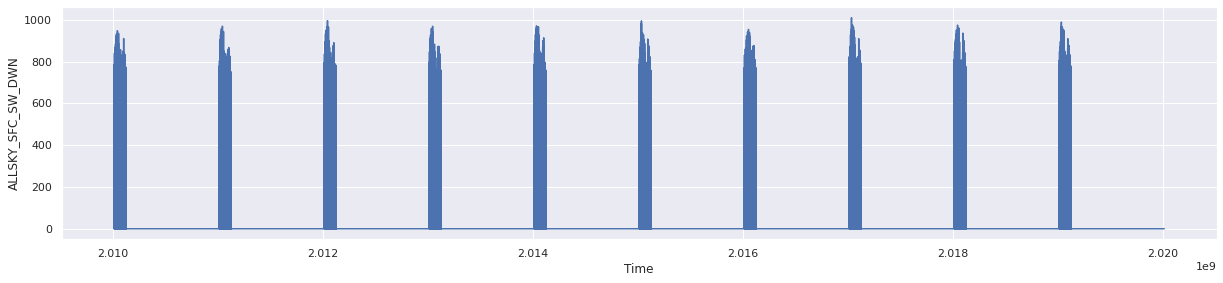

In [133]:
sns.set(rc={'figure.figsize':(20.7,4.27)})
sns.lineplot(x=df.Time, y=df.ALLSKY_SFC_SW_DWN, data=df)

In [134]:
df_cleaned = df.drop(index=df[(df == -999).any(axis=1)].index)

<AxesSubplot:xlabel='Time', ylabel='ALLSKY_SFC_SW_DWN'>

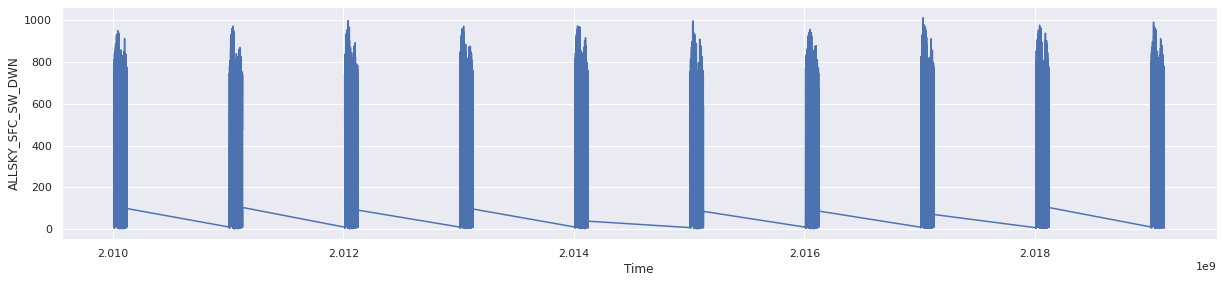

In [135]:
sns.lineplot(x=df_cleaned.Time, y=df_cleaned.ALLSKY_SFC_SW_DWN, data=df_cleaned)

In [136]:
df_cleaned

,Time,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_UV_INDEX,T2M,T2MDEW,TS,RH2M,PS,WS50M,SZA,PRECTOTCORR,WS10M,QV2M
0,2010010106,10.45,8.15,0.36,308.02,0.00,12.01,12.41,12.46,100.00,101.04,4.05,88.82,0.0,2.75,8.91
1,2010010107,139.84,148.05,0.50,312.48,0.20,13.69,12.87,15.45,94.69,101.15,3.92,78.62,0.0,3.04,9.16
2,2010010108,334.69,359.02,0.62,328.77,1.20,15.49,13.36,18.74,87.00,101.23,3.58,67.30,0.0,3.17,9.46
3,2010010109,514.27,544.30,0.68,335.90,2.85,18.38,12.94,21.64,70.50,101.28,4.59,57.47,0.0,4.01,9.22
4,2010010110,685.15,679.58,0.76,313.05,4.73,20.09,13.10,23.79,64.00,101.25,4.70,50.00,0.0,4.18,9.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87630,2019123112,719.53,729.92,0.74,338.50,6.35,25.24,17.07,28.80,60.44,101.30,1.01,46.70,0.0,0.80,12.02
87631,2019123113,654.30,649.42,0.75,337.52,4.95,25.55,17.01,28.12,59.19,101.18,1.27,51.54,0.0,1.09,12.02
87632,2019123114,502.70,501.85,0.70,343.65,2.80,25.50,16.90,26.87,58.94,101.11,1.37,59.64,0.0,1.20,11.90
87633,2019123115,289.05,308.88,0.59,349.83,0.95,25.29,16.92,25.40,59.81,101.09,1.32,69.86,0.0,1.14,11.96


# extra data

In [2]:
import json
import pandas as pd
file = open('download_data/single_point/daily/File_Lat_22.67_Lon_92.11.json')
file = json.load(file)


df_daily = pd.DataFrame()

file = file['properties']['parameter']

column_name = list(file.keys())

time = list(file[column_name[0]].keys())

df_daily['Time'] = time
for n in range(len(column_name)):
    df_daily[column_name[n]] = list(file[column_name[n]].values())


In [3]:
df_daily = df_daily.dropna(how='any')
df_daily.set_index('Time')
df_daily.Time = df_daily.Time.astype('int')
df_daily

,Time,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_UV_INDEX,T2M,T2MDEW,TS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M,PS,WS50M
0,19940101,3.42,4.20,0.51,369.70,-999.00,20.62,9.64,21.14,10.34,26.69,16.35,51.06,101.12,3.77
1,19940102,4.31,4.53,0.63,343.90,-999.00,20.69,8.10,21.44,14.30,28.52,14.22,46.62,101.05,4.38
2,19940103,4.34,4.60,0.64,372.00,-999.00,20.94,9.44,21.54,14.27,28.87,14.61,50.25,101.13,4.12
3,19940104,4.49,4.63,0.66,337.20,-999.00,20.91,9.26,21.49,14.78,29.26,14.48,50.12,100.98,4.80
4,19940105,4.66,4.71,0.68,322.10,-999.00,20.73,8.26,20.79,13.34,27.55,14.22,47.25,100.90,3.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9490,20191226,3.94,4.11,0.59,343.05,1.09,18.30,14.44,18.98,11.80,24.58,12.77,80.19,101.04,3.36
9491,20191227,1.98,4.01,0.30,387.01,0.73,17.34,15.40,18.17,9.41,23.39,13.97,89.06,100.96,3.68
9492,20191228,2.63,4.01,0.39,360.77,0.73,16.65,13.87,17.36,8.61,21.54,12.93,84.50,101.14,4.35
9493,20191229,4.17,4.58,0.62,337.23,1.09,17.43,13.79,17.71,11.45,23.15,11.70,80.06,101.12,2.48
